In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import plotly.express as px

import os
import env
import wrangle

- As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

- Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

- Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

- Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

- Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

- Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

- Come up with some initial hypotheses based on your goal of predicting property value.

- Visualize all combinations of variables in some way.

- Run the appropriate statistical tests where needed.

- What independent variables are correlated with the dependent variable, home value?

- Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

- Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

- Explore your dataset with any other visualizations you think will be helpful.

In [2]:
train, validate, test = wrangle.wrangle_zillow()

In [3]:
# to be used later in modeling
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)


In [4]:
train.head()

bedrooms  bathrooms  square_feet  tax_value  year_built  \
21713       4.0        3.5       2267.0   521009.0      1961.0   
25462       3.0        2.5       1749.0    53463.0      1966.0   
49288       3.0        2.0       1323.0   334520.0      1976.0   
16497       4.0        2.0       1712.0   702000.0      1967.0   
12093       3.0        3.0       2547.0   936812.0      1986.0   

       lot_square_feet    fips  region_zip  logerror transaction_date  \
21713          10304.0  6059.0     97005.0  0.020513       2017-05-02   
25462           3072.0  6059.0     96947.0 -0.006118       2017-05-19   
49288           6914.0  6111.0     96385.0 -0.085399       2017-08-30   
16497           7438.0  6059.0     96995.0 -0.006687       2017-03-31   
12093           5000.0  6059.0     96961.0  0.003956       2017-03-16   

         latitude    longitude decade  
21713  33761524.0 -117794941.0  1960s  
25462  33664349.0 -117818327.0  1960s  
49288  34211628.0 -118832897.0  1970s  
16497  33606081.0 -117664312.0  1960s  
12093  33485264.0 -117691709.0  1980s

In [5]:
train.dtypes

bedrooms            float64
bathrooms           float64
square_feet         float64
tax_value           float64
year_built          float64
lot_square_feet     float64
fips                float64
region_zip          float64
logerror            float64
transaction_date     object
decade               object
dtype: object

In [6]:
train.describe().T

count           mean            std           min  \
bedrooms         23867.0       3.200779       0.852035      1.000000   
bathrooms        23867.0       2.090103       0.766395      1.000000   
square_feet      23867.0    1678.483387     627.174402    300.000000   
tax_value        23867.0  370806.595592  247010.231317   9242.000000   
year_built       23867.0    1961.474840      22.289280   1878.000000   
lot_square_feet  23867.0    6621.677756    2064.658709   1313.000000   
fips             23867.0    6049.050027      20.824576   6037.000000   
region_zip       23867.0   96566.448318     421.050614  95982.000000   
logerror         23867.0       0.016758       0.161497     -4.453964   

                           25%            50%           75%           max  
bedrooms              3.000000       3.000000       4.00000  9.000000e+00  
bathrooms             2.000000       2.000000       2.50000  7.500000e+00  
square_feet        1223.000000    1546.000000    2018.50000  3.858000e+03  
tax_value        172179.000000  332731.000000  518000.00000  1.163971e+06  
year_built         1950.000000    1959.000000    1976.00000  2.016000e+03  
lot_square_feet    5400.000000    6499.000000    7674.50000  1.248700e+04  
fips               6037.000000    6037.000000    6059.00000  6.111000e+03  
region_zip        96206.000000   96415.000000   96996.00000  9.733000e+04  
logerror             -0.024029       0.005628       0.03637  3.100913e+00

In [9]:
print(len(train.year_built.value_counts()))
len(train.region_zip.value_counts())

143


381

year_built
1955.0    957
1950.0    821
1954.0    786
1953.0    755
1956.0    672
         ... 
1893.0      2
1896.0      2
1878.0      1
1887.0      1
2016.0      1
Name: year_built, Length: 125, dtype: int64
1955.0    4.009721
1950.0    3.439896
1954.0    3.293250
1953.0    3.163364
1956.0    2.815603
            ...   
1893.0    0.008380
1896.0    0.008380
1878.0    0.004190
1887.0    0.004190
2016.0    0.004190
Name: year_built, Length: 125, dtype: float64


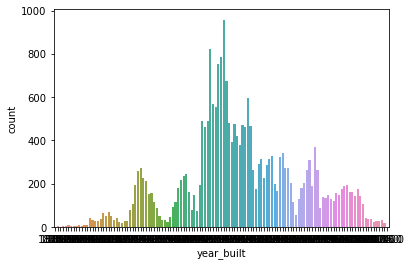

fips
6037.0    15394
6059.0     6527
6111.0     1946
Name: fips, dtype: int64
6037.0    64.499099
6059.0    27.347383
6111.0     8.153517
Name: fips, dtype: float64


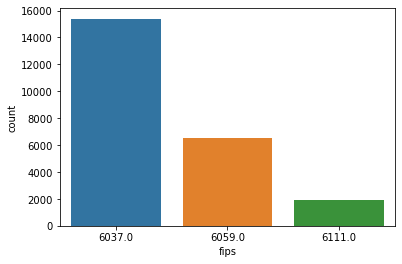

region_zip
97318.0    327
97319.0    316
97328.0    279
97329.0    252
96193.0    248
          ... 
97092.0      1
96207.0      1
96226.0      1
95996.0      1
96148.0      1
Name: region_zip, Length: 373, dtype: int64
97318.0    1.370093
97319.0    1.324004
97328.0    1.168978
97329.0    1.055851
96193.0    1.039092
             ...   
97092.0    0.004190
96207.0    0.004190
96226.0    0.004190
95996.0    0.004190
96148.0    0.004190
Name: region_zip, Length: 373, dtype: float64


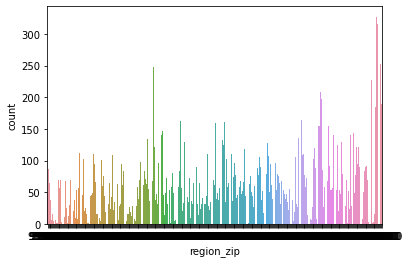

decade
1950s    6462
1960s    3833
1970s    2722
1940s    2568
1980s    2015
1920s    1771
1990s    1490
2000s    1343
1930s     877
1910s     396
1900s     199
2010s     167
1890s      19
1880s       4
1870s       1
Name: decade, dtype: int64
1950s    27.075041
1960s    16.059832
1970s    11.404869
1940s    10.759626
1980s     8.442620
1920s     7.420287
1990s     6.242930
2000s     5.627016
1930s     3.674530
1910s     1.659195
1900s     0.833787
2010s     0.699711
1890s     0.079608
1880s     0.016760
1870s     0.004190
Name: decade, dtype: float64


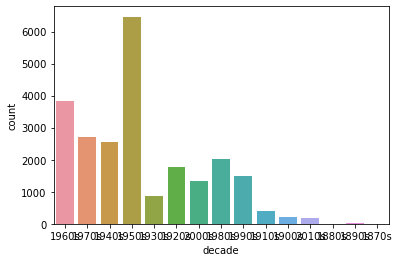

In [6]:
num_vars = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'lot_square_feet']
cat_vars = ['year_built', 'fips', 'region_zip', 'decade']

for col in cat_vars:
    print(col)
    print(train[col].value_counts())
    print(train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=train)
    plt.show()

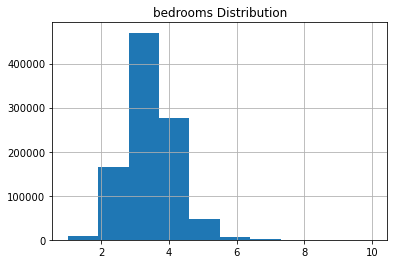

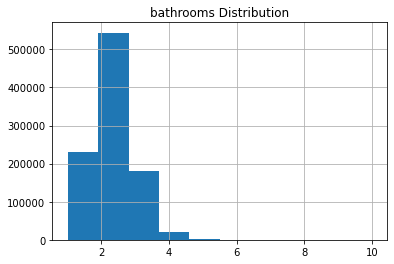

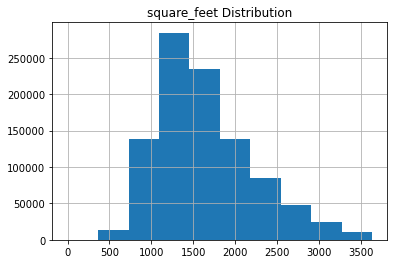

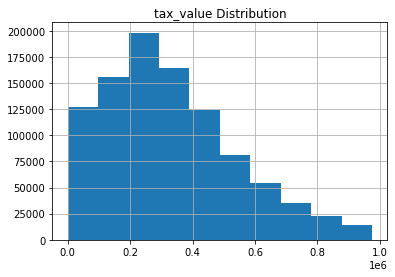

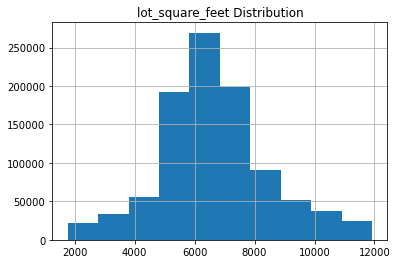

In [8]:
for col in num_vars:
    train[col].hist()
    plt.title(col+' Distribution')
    plt.show()

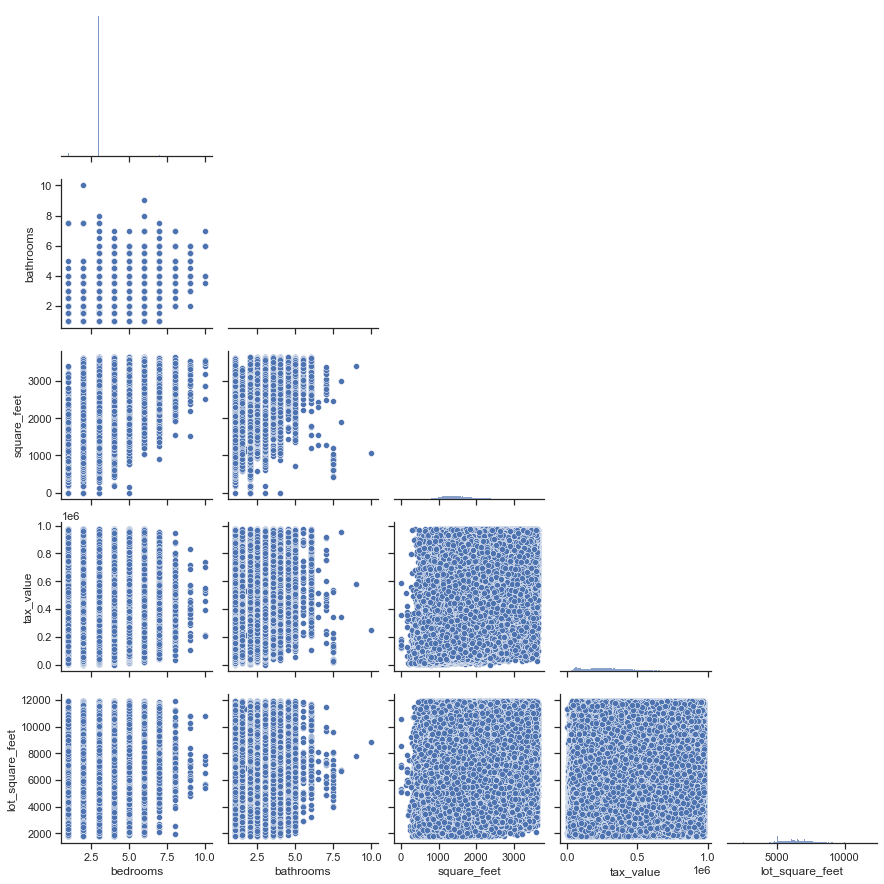

In [11]:
train_scatter = train[['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'lot_square_feet']]
sns.set_theme(style="ticks")
sns.pairplot(train_scatter, corner=True)


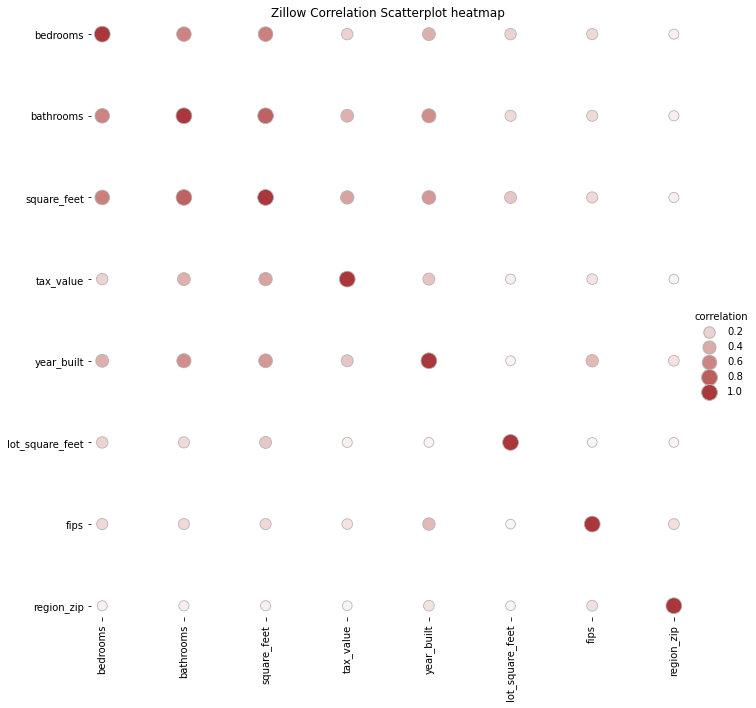

In [10]:
train_corr = train.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=train_corr,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8))
g.set(xlabel="", ylabel="", title='Zillow Correlation Scatterplot heatmap', aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

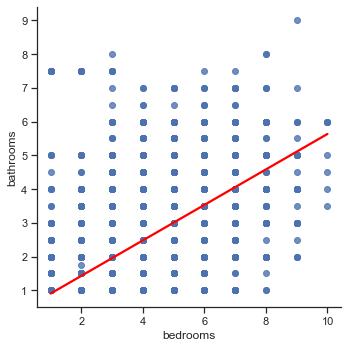

In [11]:
sns.lmplot(x="bedrooms", y="bathrooms", data=train, line_kws={'color': 'red'})
plt.show()

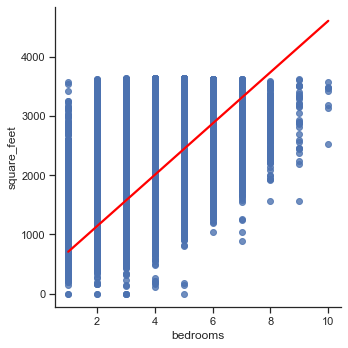

In [12]:
sns.lmplot(x="bedrooms", y="square_feet", data=train, line_kws={'color': 'red'})
plt.show()

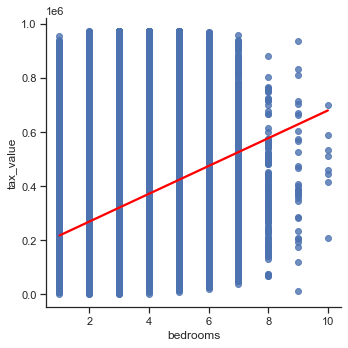

In [13]:
sns.lmplot(x="bedrooms", y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

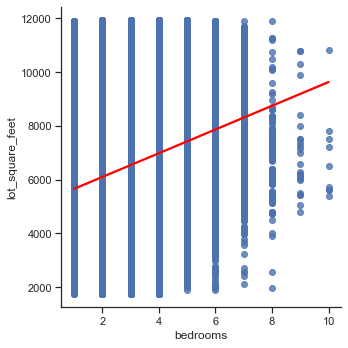

In [13]:
sns.lmplot(x="bedrooms", y="lot_square_feet", data=train, line_kws={'color': 'red'})
plt.show()

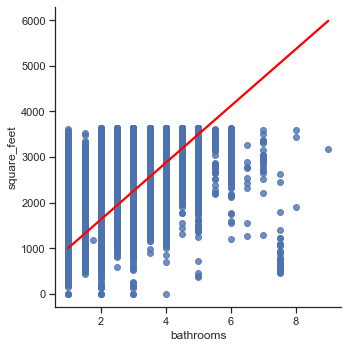

In [15]:
sns.lmplot(x="bathrooms", y="square_feet", data=train, line_kws={'color': 'red'})
plt.show()

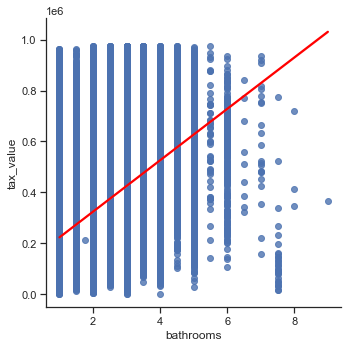

In [16]:
sns.lmplot(x="bathrooms", y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

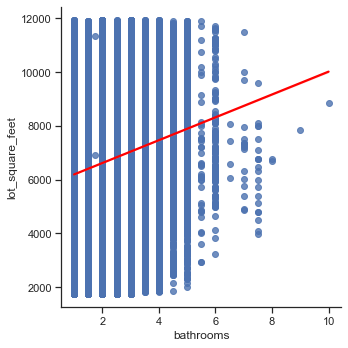

In [14]:
sns.lmplot(x="bathrooms", y="lot_square_feet", data=train, line_kws={'color': 'red'})
plt.show()

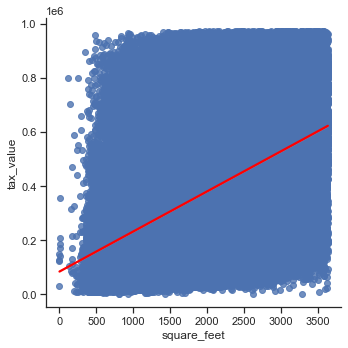

In [18]:
sns.lmplot(x="square_feet", y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

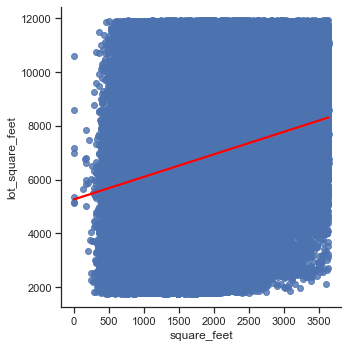

In [15]:
sns.lmplot(x="square_feet", y="lot_square_feet", data=train, line_kws={'color': 'red'})
plt.show()

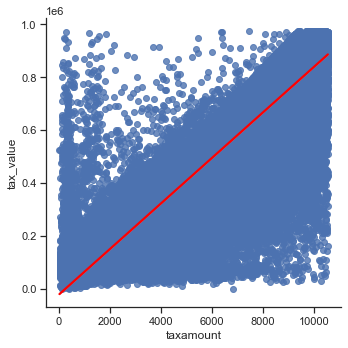

In [20]:
sns.lmplot(x="taxamount", y="tax_value", data=train, line_kws={'color': 'red'})
plt.show()

<AxesSubplot:xlabel='year_built', ylabel='lot_square_feet'>

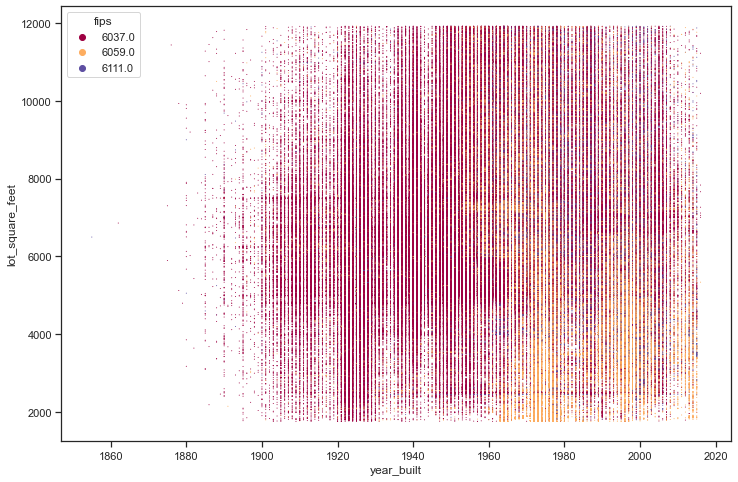

In [16]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="year_built", y="lot_square_feet",
                hue="fips", s=1,
                palette="Spectral",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

<AxesSubplot:xlabel='decade', ylabel='lot_square_feet'>

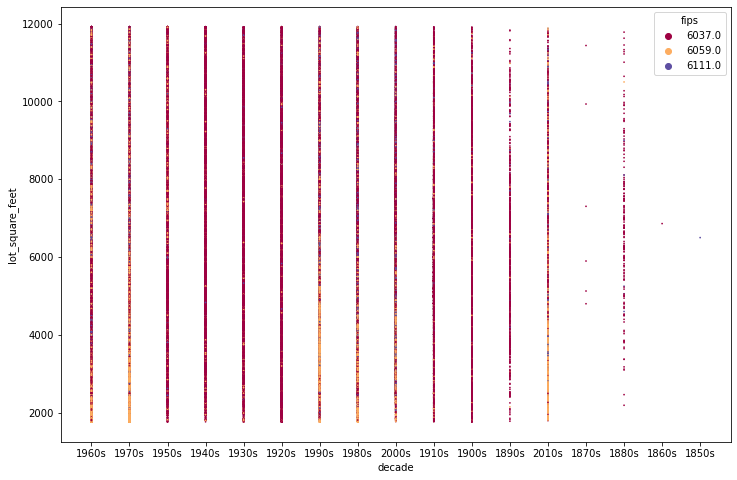

In [12]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="decade", y="lot_square_feet",
                hue="fips", s=3,
                palette="Spectral",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

<AxesSubplot:xlabel='year_built', ylabel='square_feet'>

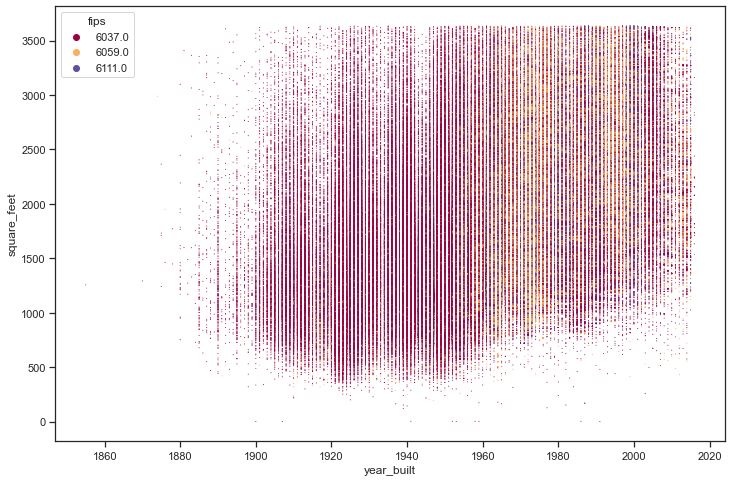

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="year_built", y="square_feet",
                hue="fips", s=1,
                palette="Spectral",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

<AxesSubplot:xlabel='year_built', ylabel='tax_value'>

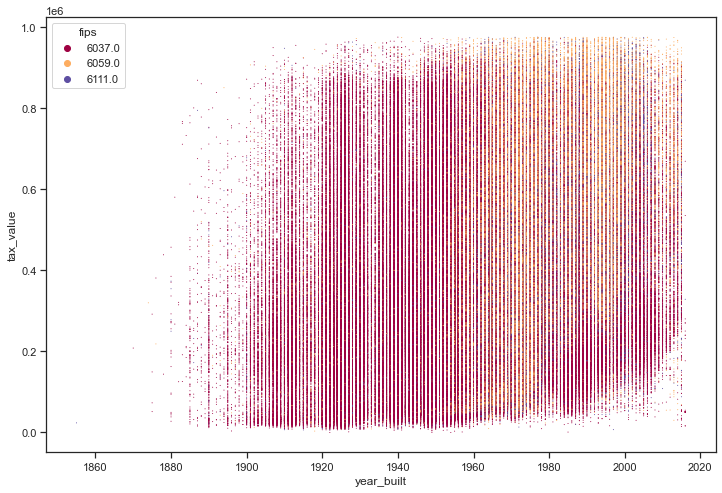

In [23]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="year_built", y="tax_value",
                hue="fips", s=1,
                palette="Spectral",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

<AxesSubplot:xlabel='decade', ylabel='tax_value'>

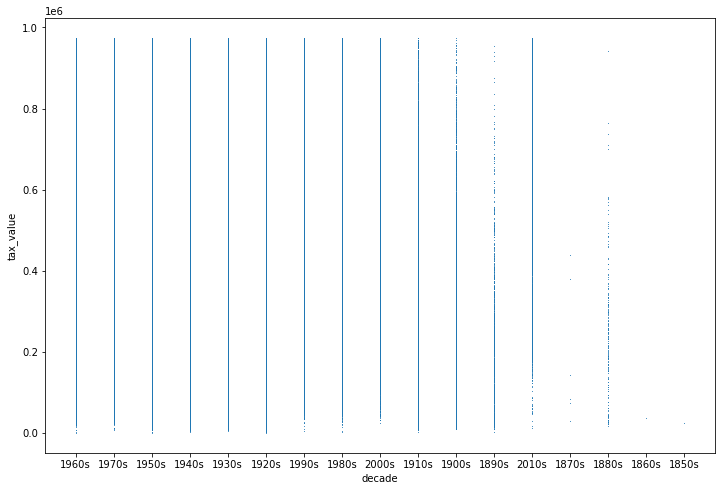

In [28]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x="decade", y="tax_value", s=1,
                palette="Spectral",
                sizes=(1, 8), linewidth=0,
                data=train, ax=ax)

In [24]:
print('fips 6037 avg tax amount:', train.loc[(train['fips'] == 6037)].taxamount.mean())
print('fips 6059 avg tax amount:', train.loc[(train['fips'] == 6059)].taxamount.mean())
print('fips 6111 avg tax amount:', train.loc[(train['fips'] == 6111)].taxamount.mean())

fips 6037 avg tax amount: 3953.28520422867
fips 6059 avg tax amount: 4481.7445597133255
fips 6111 avg tax amount: 4222.158621541284


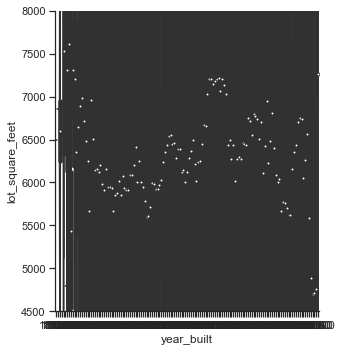

In [21]:
g = sns.catplot(data=train, kind="violin", x="year_built", y="lot_square_feet", palette="Spectral")
g.set(ylim=(4500, 8000))

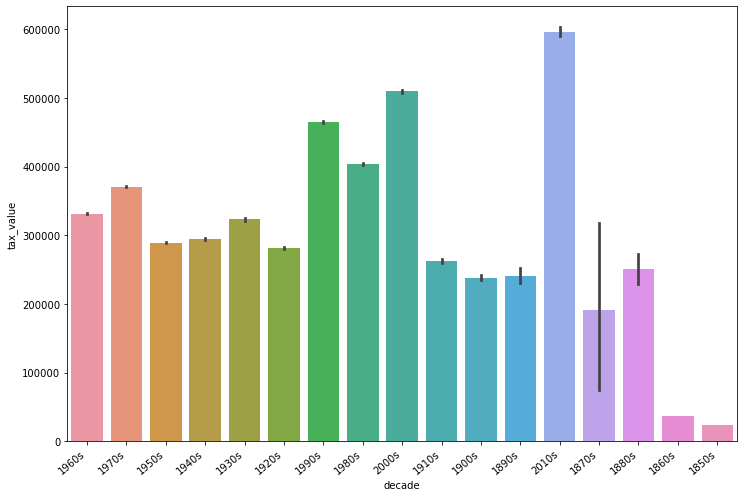

In [24]:
plt.figure(figsize = (12, 8))
ax = sns.barplot(x='decade', y='tax_value', data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()


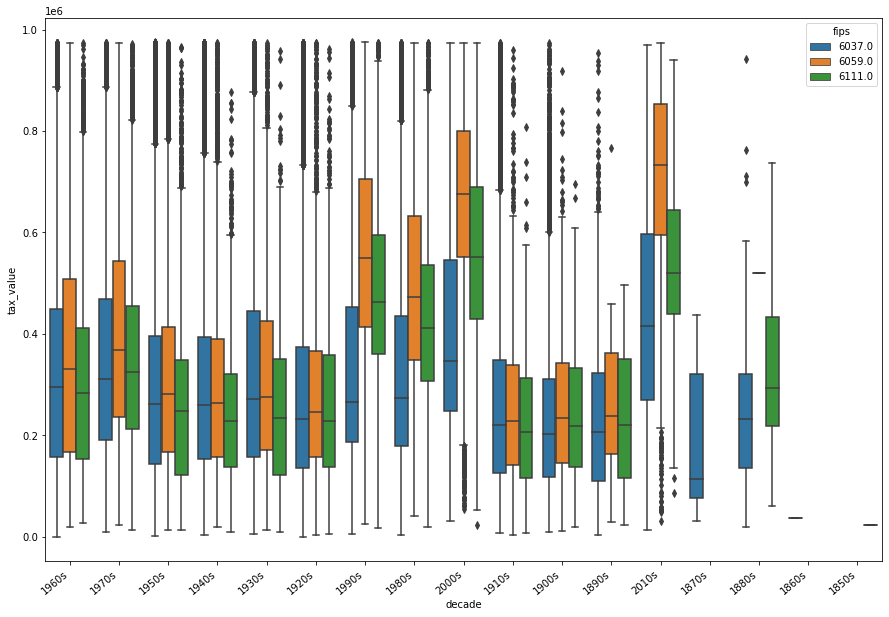

In [37]:
plt.figure(figsize = (15, 10))
ax = sns.boxplot(x='decade', y='tax_value', data=train, hue='fips')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

<Figure size 864x720 with 0 Axes>

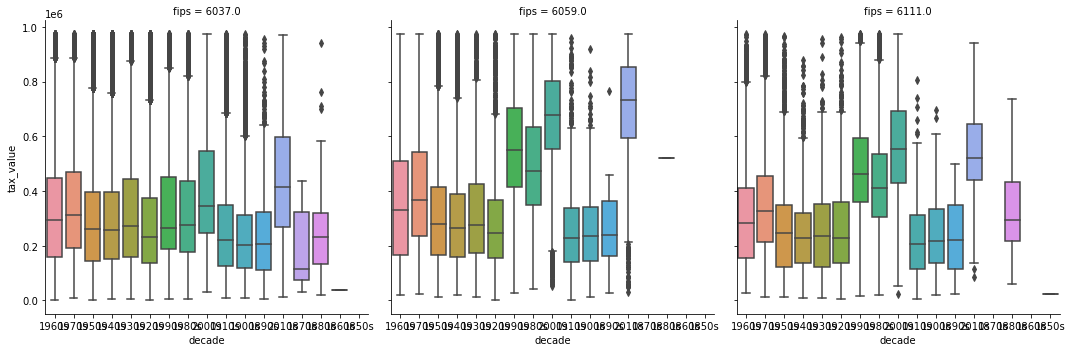

In [35]:
plt.figure(figsize = (12, 10))
ax = sns.catplot(x='decade', y='tax_value', data=train, col='fips', kind='box')
plt.show()

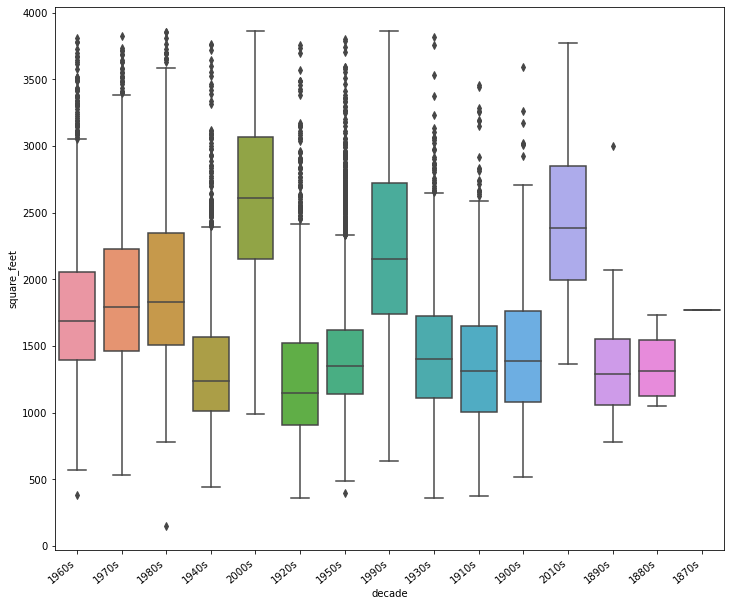

In [20]:
plt.figure(figsize = (12, 10))
ax = sns.boxplot(x='decade', y='square_feet', data=train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [21]:
train.head()

bedrooms  bathrooms  square_feet  tax_value  year_built  \
21713       4.0        3.5       2267.0   521009.0      1961.0   
25462       3.0        2.5       1749.0    53463.0      1966.0   
49288       3.0        2.0       1323.0   334520.0      1976.0   
16497       4.0        2.0       1712.0   702000.0      1967.0   
12093       3.0        3.0       2547.0   936812.0      1986.0   

       lot_square_feet    fips  region_zip  logerror transaction_date  \
21713          10304.0  6059.0     97005.0  0.020513       2017-05-02   
25462           3072.0  6059.0     96947.0 -0.006118       2017-05-19   
49288           6914.0  6111.0     96385.0 -0.085399       2017-08-30   
16497           7438.0  6059.0     96995.0 -0.006687       2017-03-31   
12093           5000.0  6059.0     96961.0  0.003956       2017-03-16   

        latitude   longitude decade     fips_str  
21713  33.761524 -117.794941  1960s   Orange, CA  
25462  33.664349 -117.818327  1960s   Orange, CA  
49288  34.211628 -118.832897  1970s  Ventura, CA  
16497  33.606081 -117.664312  1960s   Orange, CA  
12093  33.485264 -117.691709  1980s   Orange, CA

In [11]:
train['latitude'] = train.latitude/1000000

In [13]:
train['longitude'] = train.longitude/1000000

In [16]:
train.fips.value_counts()

6037.0    15440
6059.0     6490
6111.0     1937
Name: fips, dtype: int64

In [18]:
def fips(x):
    if x == 6037:
        return 'Los Angeles, CA'
    if x == 6059:
        return 'Orange, CA'
    if x == 6111:
        return 'Ventura, CA'

In [19]:
train['fips_str'] = train['fips'].apply(fips)

In [33]:
import plotly.express as px
fig = px.scatter_mapbox(train, lat="latitude", lon="longitude", hover_name="fips_str", hover_data=["region_zip", "tax_value", "bedrooms", "bathrooms"],
                        color_discrete_sequence=["blue"], color="tax_value", zoom=8, height=700)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
